In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CHANGE PATH/URL TO SOME PUBLIC DOMAIN
# Load in dataset to pandas DataFrame
dataset = pd.read_csv("dataset.csv")

In [10]:
# Check for missing values
dataset.isna().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
LastUpdated         0
dtype: int64


In [11]:
# Check for null values
dataset.isnull().sum()

SystemCodeNumber    0
Capacity            0
Occupancy           0
LastUpdated         0
dtype: int64


In [22]:
# Find the statistics of the dataset
dataset.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [27]:
# We see that the minimum value for Occupancy is -8, but this shouldn't be
# possible as you cannot have -8 parking spaces filled

# Find all the cases where the value of Occupancy is negative
dataset[dataset['Occupancy'] < 0]

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
23889,NIA North,480,-3,2016-10-16 15:57:16
23890,NIA North,480,-3,2016-10-16 16:31:17
23906,NIA North,480,-1,2016-10-18 15:27:59
23919,NIA North,480,-8,2016-10-28 13:02:43
23924,NIA North,480,-1,2016-10-28 15:29:41
23925,NIA North,480,-4,2016-10-28 16:02:40
23926,NIA North,480,-1,2016-10-28 16:29:42
23937,NIA North,480,-2,2016-10-29 12:59:51
23944,NIA North,480,-1,2016-10-29 16:26:53
23997,NIA North,480,-3,2016-11-10 16:00:15


In [29]:
# Find the indices of the rows containing these negative values and drop them
drop_indices = list(dataset[dataset['Occupancy'] < 0].index)
dataset = dataset.drop(drop_indices)

In [30]:
dataset.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [31]:
# In this case, the attributes are SystemCodeNumber (categorical) , Capacity (numerical),
# Occupancy (numerical), and LastUpdated (numerical - Time)
# SystemCodeNumber - code delineating a parking lot
# Capacity - maximum occupancy allowed (max # of spaces)
# Occupancy - number of spaces currently filled
# LastUpdated - last day and time when the occupancy was noted

<AxesSubplot:ylabel='Frequency'>

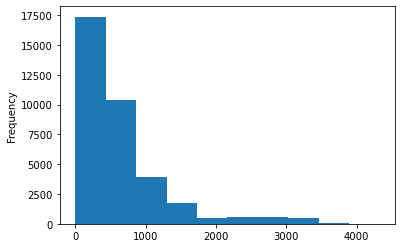

In [42]:
# The Occupancy data is heavily skewed to the right
# Occupancy will be the value that we are trying to predict
dataset['Occupancy'].plot(kind='hist')

In [ ]:
# We want to use the time data as our attributes
# 